<a href="https://colab.research.google.com/github/jpablomhr/crossingborderts/blob/main/bordercross.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import itertools


# Ignore warnings
warnings.filterwarnings('ignore')


import scipy.stats as ss
from pylab import rcParams
import statsmodels.api as sm

In [ ]:
data = pd.read_csv('/content/Border_Crossing_Entry_Data.csv')
data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


In [ ]:
data.info()
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355511 entries, 0 to 355510
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Port Name  355511 non-null  object        
 1   State      355511 non-null  object        
 2   Port Code  355511 non-null  int64         
 3   Border     355511 non-null  object        
 4   Date       355511 non-null  datetime64[ns]
 5   Measure    355511 non-null  object        
 6   Value      355511 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 19.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355511 entries, 0 to 355510
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Port Name  355511 non-null  object        
 1   State      355511 non-null  object        
 2   Port Code  355511 non-null  int64         
 3   Border     355511 non-null  objec

In [ ]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month
0,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicle Passengers,1414,2020,2
1,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicles,763,2020,2
2,Alcan,AK,3104,US-Canada Border,2020-02-01,Truck Containers Empty,412,2020,2
3,Alcan,AK,3104,US-Canada Border,2020-02-01,Truck Containers Full,122,2020,2
4,Alcan,AK,3104,US-Canada Border,2020-02-01,Trucks,545,2020,2


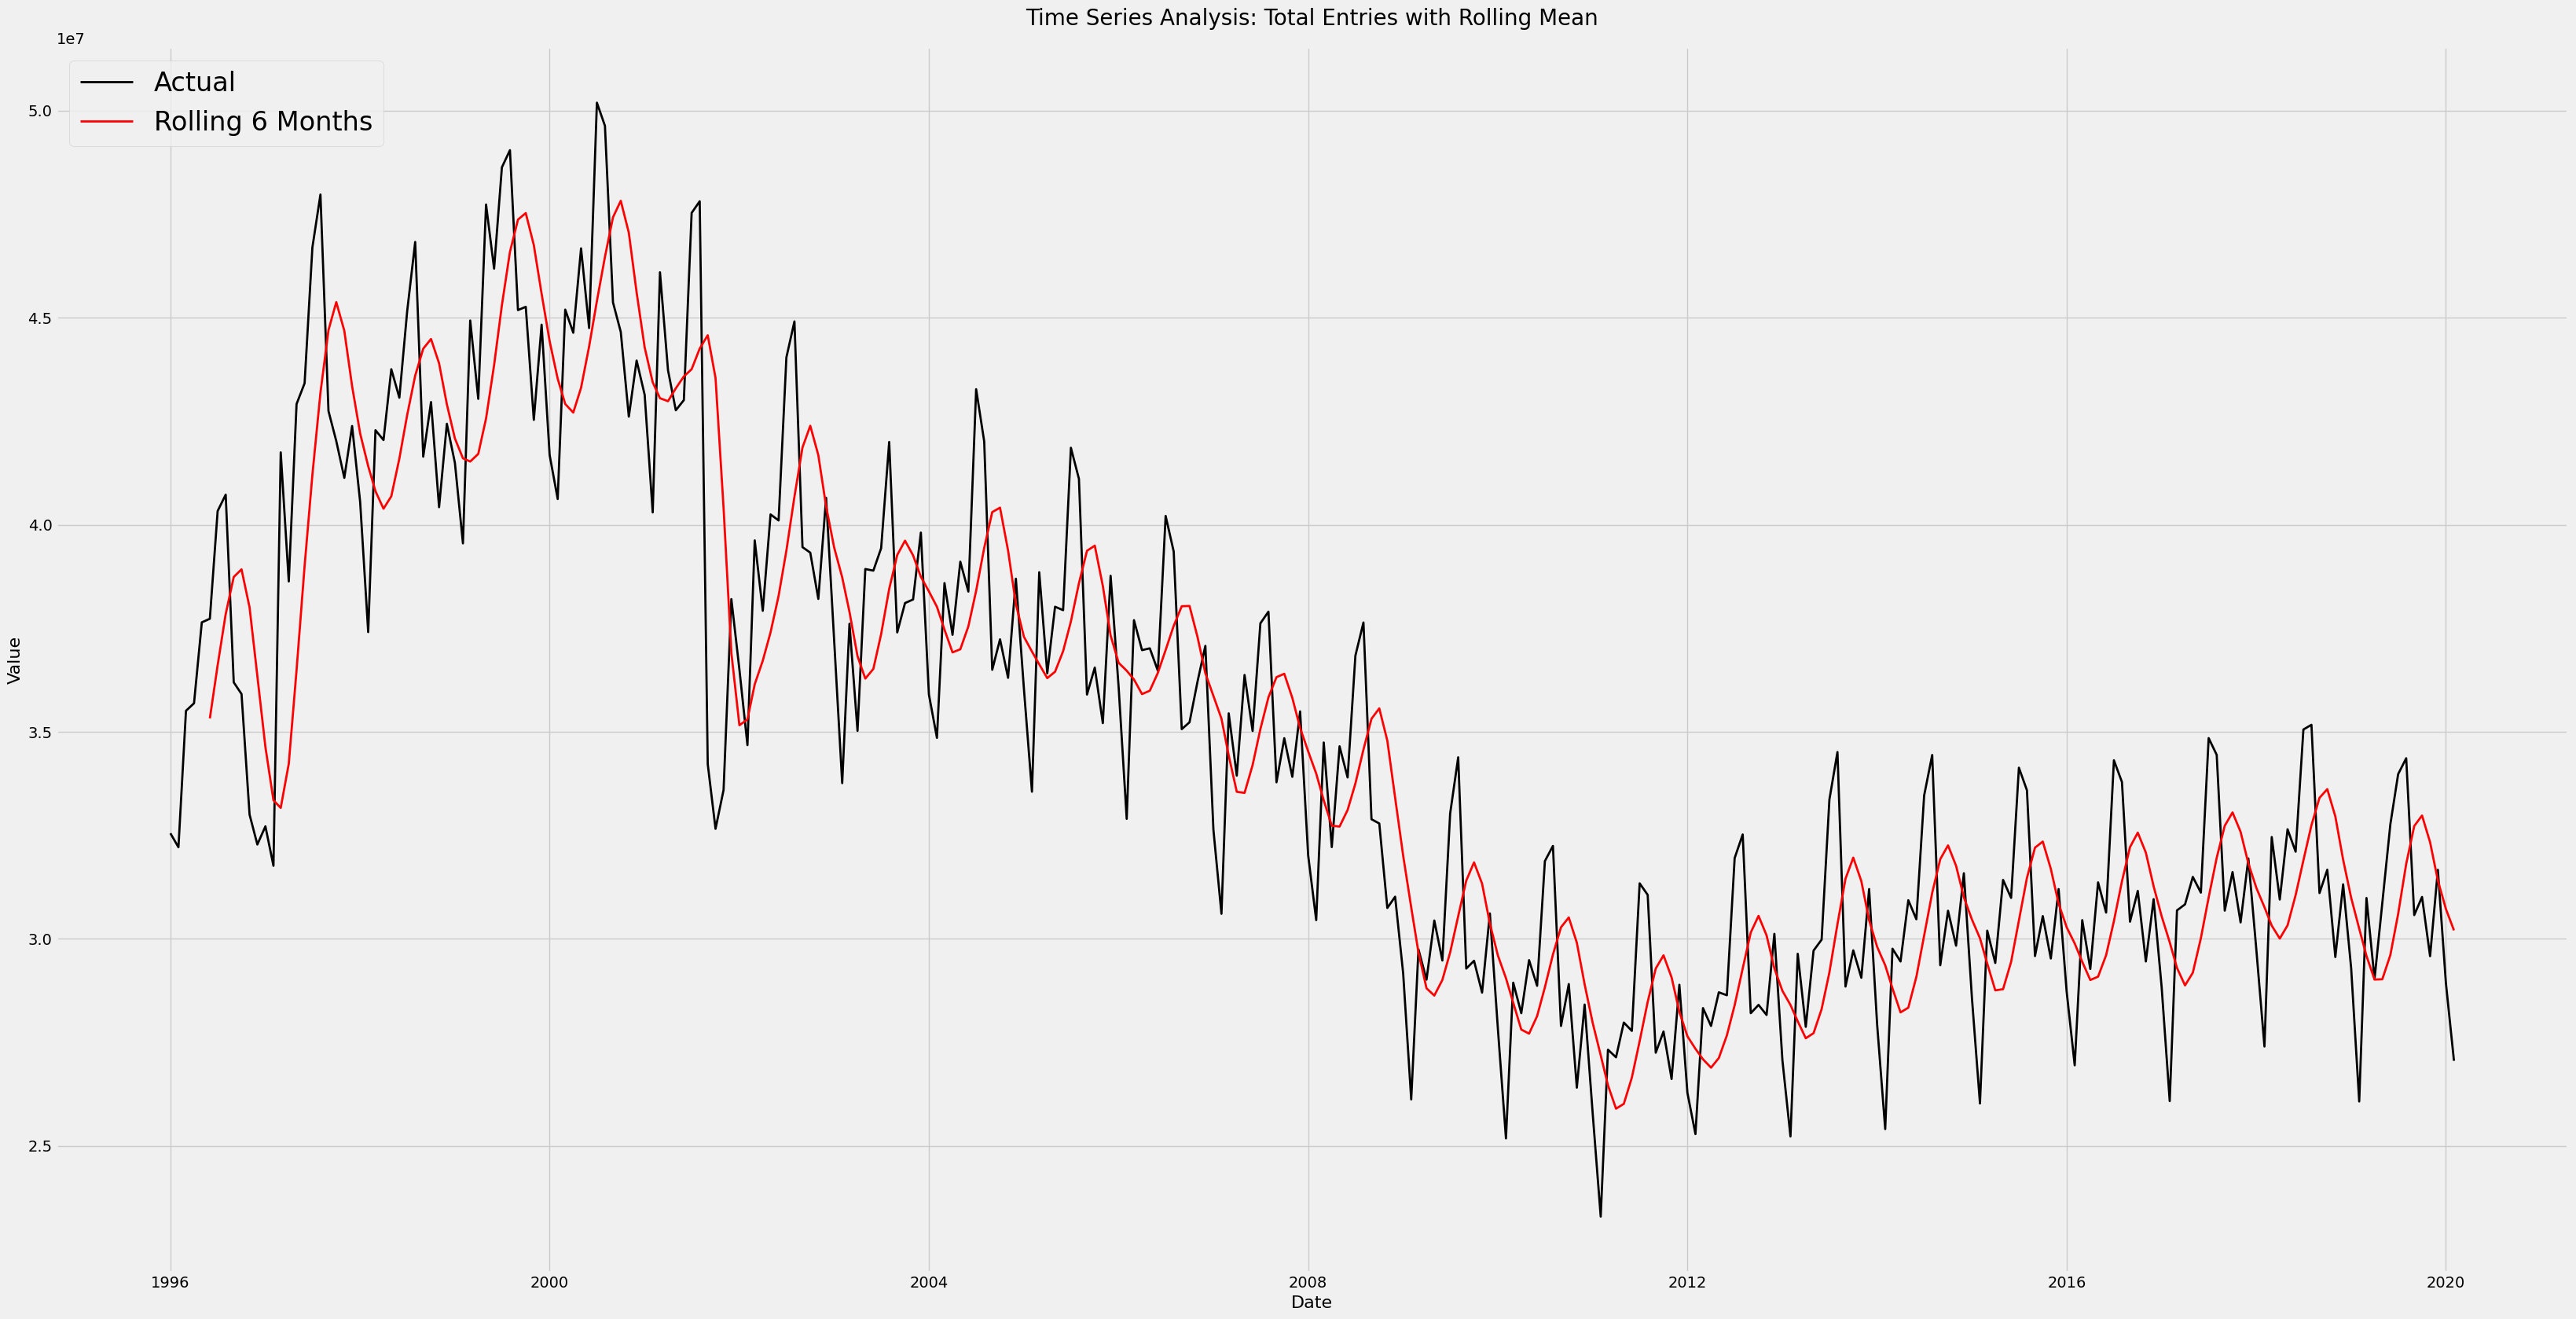

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(33, 17))

time_series = (
    data.groupby('Date', as_index=False)['Value']
    .sum()

)


time_series['Date'] = pd.to_datetime(time_series['Date'])
time_series.set_index('Date', inplace=True)

# Calcular la media móvil de 6 meses con ventana triangular
rolling_mean = (
    time_series['Value']
    .rolling(window=6, win_type='triang')
    .mean()
    .to_frame(name='Value')
)



sns.lineplot(
    x=time_series.index,
    y='Value',
    data=time_series,
    label="Actual",
    linewidth=2,
    color='black'
)


sns.lineplot(
    x=rolling_mean.index,
    y='Value',
    data=rolling_mean,
    label="Rolling 6 Months",
    linewidth=2,
    color='red'
)


plt.title('Time Series Analysis: Total Entries with Rolling Mean', fontsize=20, pad=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend(fontsize='xx-large', loc='upper left')
plt.tight_layout()
plt.show()